<a href="https://colab.research.google.com/github/asillymind22/AI_FINALPROJECT/blob/main/Aiproject_trainmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#preparing libary
import numpy as np
import functools
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import pickle

In [ ]:
!unzip /content/gdrive/MyDrive/datatrain.zip

Archive:  /content/gdrive/MyDrive/datatrain.zip
   creating: datatrain/
   creating: datatrain/bike/
  inflating: datatrain/bike/01.jpg   
  inflating: datatrain/bike/02.jpg   
  inflating: datatrain/bike/03.jpg   
  inflating: datatrain/bike/04.jpg   
  inflating: datatrain/bike/05.jpg   
  inflating: datatrain/bike/08.jpg   
  inflating: datatrain/bike/09.jpg   
  inflating: datatrain/bike/10.jpg   
  inflating: datatrain/bike/100.jpg  
  inflating: datatrain/bike/101.jpg  
  inflating: datatrain/bike/10129.jpg  
  inflating: datatrain/bike/10130.jpg  
  inflating: datatrain/bike/10163.jpg  
  inflating: datatrain/bike/10166.jpg  
  inflating: datatrain/bike/10169.jpg  
  inflating: datatrain/bike/102.jpg  
  inflating: datatrain/bike/10202.jpg  
  inflating: datatrain/bike/10219.jpg  
  inflating: datatrain/bike/10347.jpg  
  inflating: datatrain/bike/10348.jpg  
  inflating: datatrain/bike/10354.jpg  
  inflating: datatrain/bike/10362.jpg  
  inflating: datatrain/bike/10385.jpg  
 

In [ ]:
!ls


datatrain  gdrive  sample_data


In [ ]:
!ls datatrain/

bike  car


In [ ]:
from pathlib import Path
train_root = Path('datatrain/')
print(len(list(train_root.glob('*.jpg'))))

0


In [ ]:
#Khởi tạo các thông số cơ bản cho data đầu vào
batch_size = 18
img_height = 224 #Resize lại các ảnh data đầu vào
img_width = 224   #Resize lại các ảnh data đầu vào

#Tạo tập Training
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_root, #đường dẫn đầu vào
    validation_split=0.2, #Use 80% data to training
    subset="training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 2745 files belonging to 2 classes.
Using 2196 files for training.


In [ ]:
#Tạp tập Validation
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_root,
    validation_split=0.2, #Use 20% data to validation
    subset="validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 2745 files belonging to 2 classes.
Using 549 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bike', 'car']


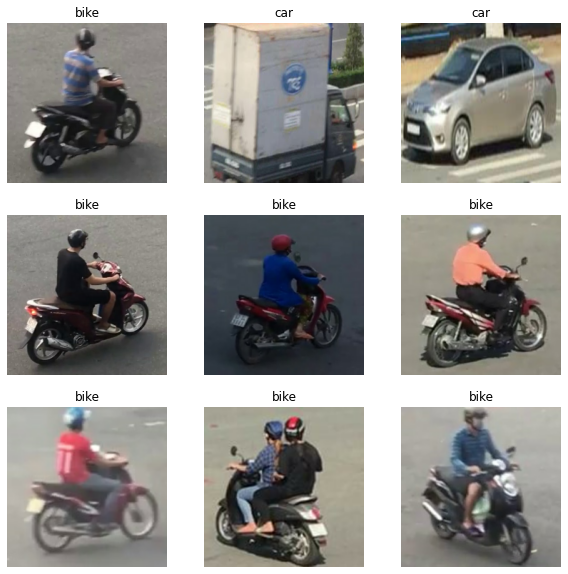

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
filelist_ds = tf.data.Dataset.list_files(str(train_root/'*/*'))
for file in filelist_ds.take(9):
  print(file)

tf.Tensor(b'datatrain/car/o592.jpg', shape=(), dtype=string)
tf.Tensor(b'datatrain/bike/16541.jpg', shape=(), dtype=string)
tf.Tensor(b'datatrain/bike/3592.jpg', shape=(), dtype=string)
tf.Tensor(b'datatrain/bike/16459.jpg', shape=(), dtype=string)
tf.Tensor(b'datatrain/car/o479.jpg', shape=(), dtype=string)
tf.Tensor(b'datatrain/bike/1639883972006.jpg', shape=(), dtype=string)
tf.Tensor(b'datatrain/bike/3376.jpg', shape=(), dtype=string)
tf.Tensor(b'datatrain/bike/1639748158196.jpg', shape=(), dtype=string)
tf.Tensor(b'datatrain/bike/1639748175275.jpg', shape=(), dtype=string)


In [ ]:
def get_label(file_path):
  part = tf.strings.split(file_path, '/')
  if part[-2] == 'car':
    labels = [0]

  else:
    labels = [1]
  return tf.convert_to_tensor(labels)

for file in filelist_ds.take(9):
  print('filename: ', file.numpy().decode('utf-8'))
  print('label: ', get_label(file).numpy())

filename:  datatrain/bike/11190.jpg
label:  [1]
filename:  datatrain/bike/18539.jpg
label:  [1]
filename:  datatrain/car/o522.jpg
label:  [0]
filename:  datatrain/bike/16742.jpg
label:  [1]
filename:  datatrain/bike/10683.jpg
label:  [1]
filename:  datatrain/bike/6635.jpg
label:  [1]
filename:  datatrain/bike/9003.jpg
label:  [1]
filename:  datatrain/car/o687.jpg
label:  [0]
filename:  datatrain/bike/1639883972058.jpg
label:  [1]


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from keras.layers import Dense, Activation, Dropout

In [ ]:

from tensorflow.keras import layers
model = tf.keras.Sequential()
model.add(layers.Conv2D(filters = 96, input_shape = (224, 224, 3), kernel_size = (11, 11), strides = (4, 4), padding = 'valid'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 256, kernel_size = (11, 11), strides = (1, 1), padding = 'valid'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'valid'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'valid'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = 'valid'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(4096, input_shape = (224*224*3, )))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.Dense(4096))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 256)       2973952   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 256)      0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 256)      1

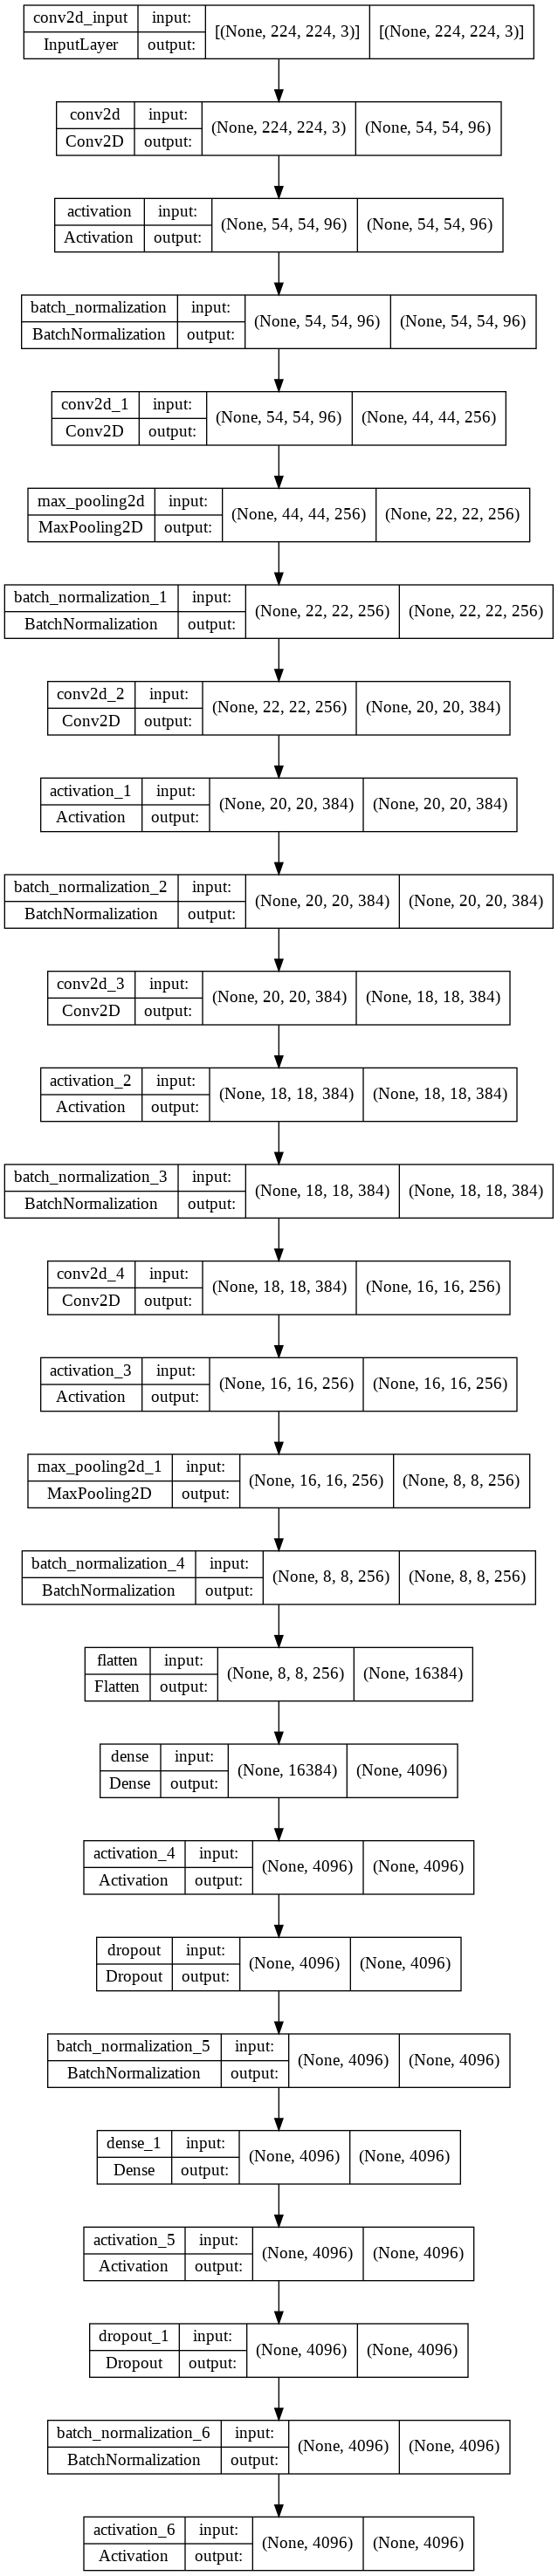

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes = True)

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

In [ ]:
history = model.fit(train_ds,epochs=100,callbacks=[callbacks] )

In [ ]:
model.save('aiprojectcardetectfinal.hdf5')